<a href="https://colab.research.google.com/github/ucfilho/Basic_Python/blob/master/Hooke_Jeeves_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting Hook-Jeeves...
x1: fun[-1.50000,  2.00000] = 12.25000
xR[-1.0, 2]fun(xR)9.0
x2: fun[-0.50000,  2.00000] =  6.25000
xR[0.5, 2]fun(xR)2.25
x3: fun[ 1.00000,  2.00000] =  1.00000
xR[2.5, 2]fun(xR)0.25
x4: fun[ 2.00000,  2.00000] =  0.00000
xR[3.0, 2]fun(xR)1.0
END
[[-1.5, 2], [-0.5, 2], [1.0, 2], [2.0, 2]]


/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


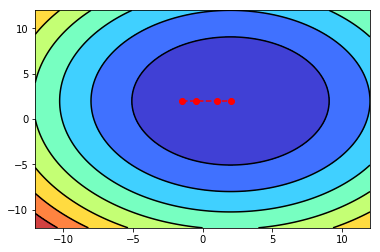

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Fri Mar 14 21:12:42 2014
@author: Alex (Python code), original implementation idea: @FlyingPirate
Hook-Jeeves optimization method
"""

import matplotlib.pylab as pl
import numpy as np
import math


def norm(s1):
    return math.sqrt(s1[0]**2 + s1[1]**2)


def fun(dot):
    return (dot[0] - 2)**2 + (dot[1]-2)**2

def pointError(x, y):
    return norm([x[0] - y[0], x[1] - y[1]])/norm(y)

    
def funcError(x, y):
    return abs(fun(x) - fun(y))/abs(fun(y))
    
def h(x0, deltax, epsilon1, epsilon2):
    print("Starting Hook-Jeeves...")
    xTB = [0,0]
    points = []
    
    n = 1
    
    while round(pointError(xTB, x0),3) > epsilon1: #or round(funcError(xTB, x0),3) > epsilon2:
        xTB = search(x0, deltax)
        
        while fun(xTB) < fun(x0):            
            print("x%d: fun[%8.5f, %8.5f] = %8.5f" %(n, xTB[0], xTB[1], fun(xTB)))
            points.append(xTB)
                       
            if round(pointError(x0, xTB),3) < epsilon1: #and round(funcError(x0, xTB),3) < epsilon2:
                print(pointError(x0, xTB))
                print(funcError(x0, xTB))
                break
            
            xR = [2*xTB[0] - x0[0], 2*xTB[1] - x0[1]]
            print("xR" + str(xR) + "fun(xR)" + str(fun(xR)))
            
            if fun(xTB) < fun(x0):
                x0 = xTB[:]
                xTB = search(xR, deltax)
                
            n+=1         
            
        deltax[0] /= 2
        deltax[1] /= 2
        
    print("END" ) 
    plot(points)
    print( points)


def search(x0, deltax):
    x1 = [x0[0] + deltax[0], x0[1]]
    if fun(x0) > fun(x1):
        x0 = x1[:]
    x2 = [x0[0] - deltax[0], x0[1]]
    if fun(x0) > fun(x2):
        x0 = x2[:]
    x3 = [x0[0], x0[1] + deltax[1]]
    if fun(x0) > fun(x3):
        x0 = x3[:]
    x4 = [x0[0], x0[1] - deltax[1]]
    if fun(x0) > fun(x4):
        x0 = x4[:]
    return x0    
    
        
def plot(points):
    '''
        Plotting 2D function and way search
    '''
    n = 256
    x = np.linspace(-12, 12, n)
    y = np.linspace(-12, 12, n)
    X, Y = np.meshgrid(x, y)
    
    xs = []
    ys = []
    
    pl.contourf(X, Y, fun([X, Y]), 8, alpha=.75, cmap='jet')
    C = pl.contour(X, Y, fun([X, Y]), 8, colors='black', linewidth=.5) 
    
    for i in range(len(points)):
        xs.append(points[i][0])
        ys.append(points[i][1])
    
    pl.plot(xs, ys, marker='o', linestyle='--', color='r', label='Square')            
    
def main():
    h([-2, 2], [0.5, 0.5], 0.01, 0.01)
    #plot([[1,1]], 'yellow')
    


if __name__ == '__main__':
   main()  